In [1]:
REGION='europe-west3'
PROJECT='decoded-vision-378913'
BUCKET='braintumorclassification'

In [ ]:
# Low Code

#list the tumor folders in the Training folder
#list the files in each tumor folder

In [2]:
from google.cloud import storage

folders = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Instantiates a client
storage_client = storage.Client()

# Get GCS bucket
bucket = storage_client.get_bucket(BUCKET)

# Get blobs in bucket (including all subdirectories)
blobs_all = list(bucket.list_blobs())

folder = folders[0]

# Get blobs in specific subirectory
blobs_specific = list(bucket.list_blobs(prefix=f'Training/{folder}'))

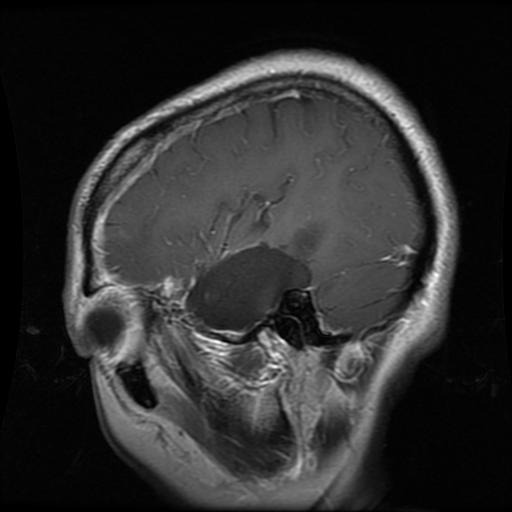

In [3]:
from IPython.display import Image

Image(blobs_specific[2].download_as_bytes())

In [4]:
import cv2
import numpy as np

decoded = cv2.imdecode(np.frombuffer(blobs_specific[2].download_as_bytes(), np.uint8), -1)

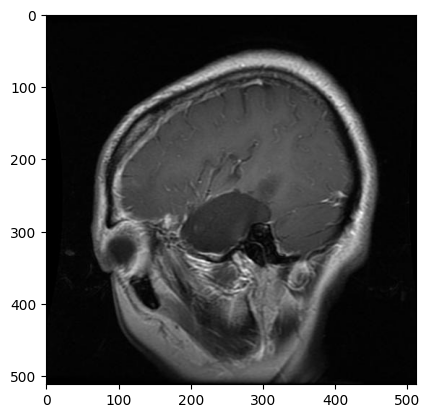

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(decoded)

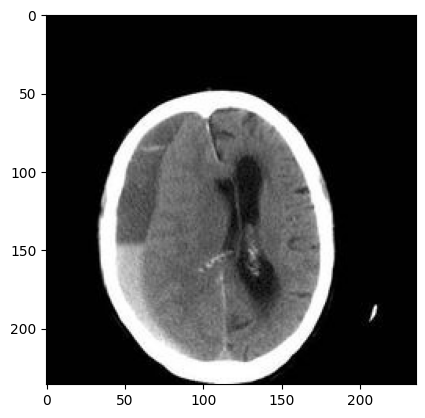

In [22]:
from google.cloud import storage

folders = ['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']

# Instantiates a client
storage_client = storage.Client()

# Get GCS bucket
bucket = storage_client.get_bucket(BUCKET)

# Get blobs in bucket (including all subdirectories)
blobs_all = list(bucket.list_blobs())

# Test
folder = folders[0]

# Get blobs in specific subirectory
blobs_specific = list(bucket.list_blobs(prefix=f'Testing/{folder}'))

image = blobs_specific[0]

test = cv2.imdecode(np.frombuffer(image.download_as_bytes(), np.uint8), -1)

plt.imshow(test)

In [13]:
target = 0 

X_train, y_train = [], []
X_test, y_test = [], []

### load training data
directories_training = {}
target = 0

for folder in folders :
    for image in list(bucket.list_blobs(prefix=f'Testing/{folder}')):
        picture = cv2.imdecode(np.frombuffer(image.download_as_bytes(), np.uint8), -1)
        picture_resized = cv2.resize(picture, (255,255))
        X_train.append(picture_resized)
        y_train.append(target)
    target += 1

In [ ]:
folder = folders[0]
images = list(bucket.list_blobs(prefix=f'Testing/{folder}'))
#images[0]


In [24]:
import os

Directory = '/Users/aurelienbiais/code/victorvone/braintumorclassification/raw_data'

X_train_local, y_train_local = [], []

### load training data
directories_training = {}
target = 0

for foldername in os.listdir(f'{Directory}/Testing'):
    if not foldername.startswith('.'):
        directories_training[foldername] = f'{Directory}/Testing/{foldername}'

for tumor_directory in directories_training.values():
    for filename in os.listdir(tumor_directory):
        filepath = os.path.join(tumor_directory, filename)
        picture = cv2.imread(filepath)[:,:,:1]
        picture_resized = cv2.resize(picture, (255,255))
        X_train_local.append(picture_resized)
        y_train_local.append(target)
    target += 1

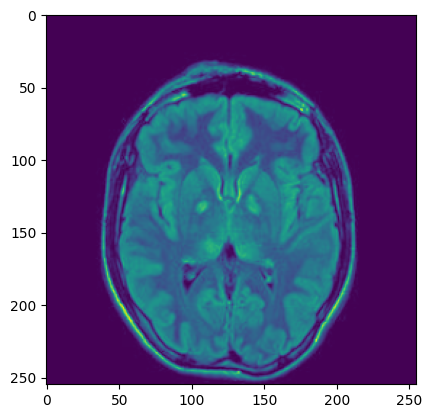

In [34]:
plt.imshow(X_train_local[100])


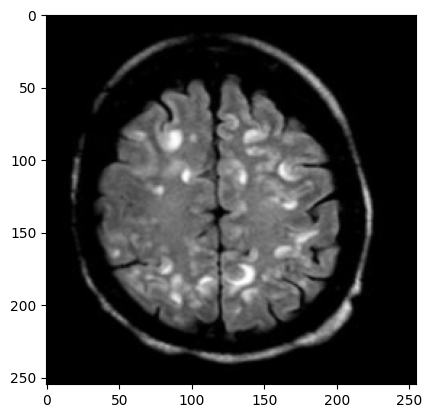

In [33]:
plt.imshow(X_train[100])
